# 1.Load & Clean Tabular Data


In [1]:
import pandas as pd
import numpy as np

train = pd.read_excel("C:/Users/Sathwika/OneDrive/Desktop/Satellite_property_valuation/Data/Raw/train(1).xlsx")
test  = pd.read_excel("C:/Users/Sathwika/OneDrive/Desktop/Satellite_property_valuation/Data/Raw/test2.xlsx")

print(train.shape, test.shape)
train.head()

train = train.drop_duplicates()

# Handle missing values SAFELY
TARGET_COL = "price"

# Select numeric columns EXCLUDING target
num_cols = train.select_dtypes(include=np.number).columns.tolist()
num_cols.remove(TARGET_COL)   # IMPORTANT

for col in num_cols:
    median_val = train[col].median()
    train[col] = train[col].fillna(median_val)
    
    # Fill test only if column exists
    if col in test.columns:
        test[col] = test[col].fillna(median_val)


# Target transformation (TRAIN ONLY)

train["log_price"] = np.log1p(train[TARGET_COL])


# Sanity checks


print("price in train:", "price" in train.columns)
print("price in test :", "price" in test.columns)
print("\nMissing values (train):")
print(train.isna().sum().sort_values(ascending=False).head())
print("\nMissing values (test):")
print(test.isna().sum().sort_values(ascending=False).head())

(16209, 21) (5404, 20)
price in train: True
price in test : False

Missing values (train):
id           0
date         0
price        0
bedrooms     0
bathrooms    0
dtype: int64

Missing values (test):
id             0
date           0
bedrooms       0
bathrooms      0
sqft_living    0
dtype: int64


# 2.Feature Engineering (Ratio-Based Features)


In [2]:
train["house_density_ratio"] = train["sqft_living"] / train["sqft_living15"]
test["house_density_ratio"]  = test["sqft_living"] / test["sqft_living15"]

train["lot_density_ratio"] = train["sqft_lot"] / train["sqft_lot15"]
test["lot_density_ratio"]  = test["sqft_lot"] / test["sqft_lot15"]

train["basement_ratio"] = train["sqft_basement"] / train["sqft_living"]
test["basement_ratio"]  = test["sqft_basement"] / test["sqft_living"]

train.replace([np.inf, -np.inf], 0, inplace=True)
test.replace([np.inf, -np.inf], 0, inplace=True)


# 3.Save Processed Data

In [3]:
train.to_csv(
    "C:/Users/Sathwika/OneDrive/Desktop/Satellite_property_valuation/Data/train_processed.csv",
    index=False
)

test.to_csv(
    "C:/Users/Sathwika/OneDrive/Desktop/Satellite_property_valuation/Data/test_processed.csv",
    index=False
)


# Exploratory Data Analysis(EDA)

(Price Distribution)

Matplotlib is building the font cache; this may take a moment.


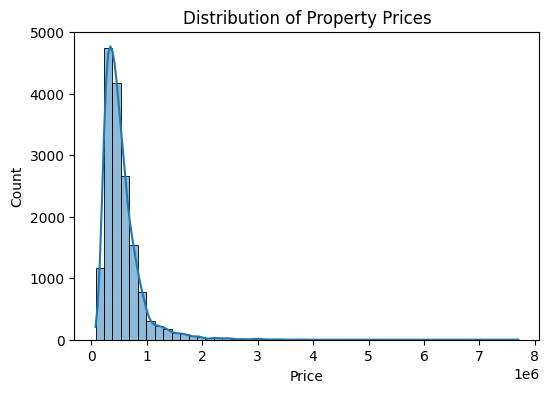

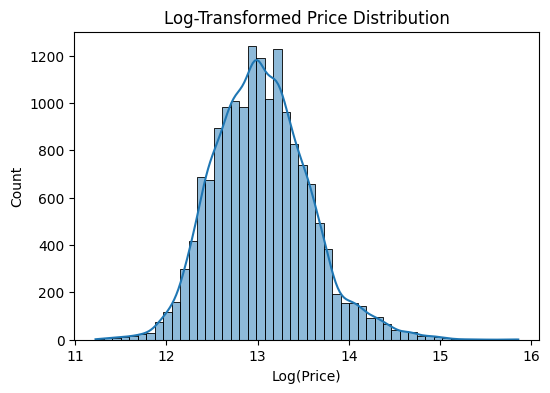

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Price distribution
plt.figure(figsize=(6,4))
sns.histplot(train["price"], bins=50, kde=True)
plt.title("Distribution of Property Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

# Log-transformed price
plt.figure(figsize=(6,4))
sns.histplot(train["log_price"], bins=50, kde=True)
plt.title("Log-Transformed Price Distribution")
plt.xlabel("Log(Price)")
plt.ylabel("Count")
plt.show()


Satellite image display

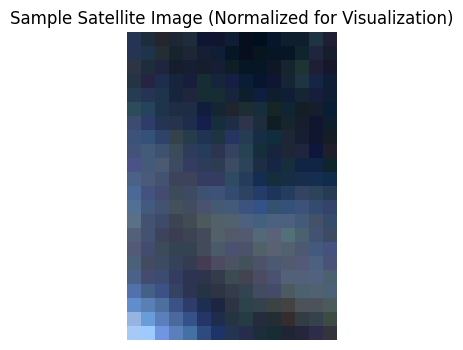

In [7]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

BASE_DIR = r"C:\Users\Sathwika\OneDrive\Desktop\Satellite_property_valuation"
IMAGE_DIR = os.path.join(BASE_DIR, "Images", "train")

img = Image.open(os.path.join(IMAGE_DIR, os.listdir(IMAGE_DIR)[0]))
img = np.array(img).astype(np.float32)

# Min-max normalization for display
img = (img - img.min()) / (img.max() - img.min() + 1e-8)

plt.figure(figsize=(4,4))
plt.imshow(img)
plt.axis("off")
plt.title("Sample Satellite Image (Normalized for Visualization)")
plt.show()


